In [1]:
import numpy as np 
import pandas as pd 

import os #The os module provides a way to interact with the operating system and handle filesystem paths.
for dirname, _, filenames in os.walk('/kaggle/input'):#checking everything inside /kaggle/input,(dirname)->path to current folder, (_)->list of subfolders
    for filename in filenames:#For each directory, the inner loop iterates over the list of files (filenames).
        print(os.path.join(dirname, filename)) 

#constructs the full path to each file by combining the directory path (dirname) 
#with the file name (filename). This full path is then printed.

/kaggle/input/nail-disease-detection-dataset/data/validation/blue_finger/Screen-Shot-2021-10-15-at-10-44-09-AM_png.rf.fa5059ea7a03fc7853fa574ce5b05a59.jpg
/kaggle/input/nail-disease-detection-dataset/data/validation/blue_finger/Screen-Shot-2021-10-15-at-10-40-07-AM_png.rf.ce1377336d3cfe8a5956c7822d0f3536.jpg
/kaggle/input/nail-disease-detection-dataset/data/validation/blue_finger/Screen-Shot-2021-10-15-at-10-43-24-AM_png.rf.d7cfd2a2eb508c0cf55d67a6e482e83f.jpg
/kaggle/input/nail-disease-detection-dataset/data/validation/blue_finger/Screen-Shot-2021-10-15-at-10-44-24-AM_png.rf.0fc15e7d1ca7e1dd1009010d21c4b025.jpg
/kaggle/input/nail-disease-detection-dataset/data/validation/blue_finger/Screen-Shot-2021-10-15-at-10-44-09-AM_png.rf.9196975a777207fee17ee744f60d81b3.jpg
/kaggle/input/nail-disease-detection-dataset/data/validation/blue_finger/Screen-Shot-2021-10-15-at-10-41-24-AM_png.rf.79aabe37924d244e8c96e49f030e57bf.jpg
/kaggle/input/nail-disease-detection-dataset/data/validation/blue_fing

The code goes through every folder and subfolder starting from /kaggle/input. It collects and prints the full paths of all the files it finds. This is helpful when you need to list all files in a directory or prepare for data tasks where knowing the file locations is important.

In [3]:
#points to where the training images are stored.
train_path = '/kaggle/input/nail-disease-detection-dataset/data/train'
#validation_path points to where the validation images are stored
validation_path = '/kaggle/input/nail-disease-detection-dataset/data/validation'

In [4]:
# list all the subdirectories within the specified training and validation dataset paths.

train_folders = [f for f in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, f))]
print("Folders in the training dataset path:", train_folders)

validation_folders = [f for f in os.listdir(validation_path) if os.path.isdir(os.path.join(validation_path, f))]
print("Folders in the validation dataset path:", validation_folders)

Folders in the training dataset path: ['blue_finger', 'Acral_Lentiginous_Melanoma', 'pitting', 'Onychogryphosis', 'clubbing', 'Healthy_Nail']
Folders in the validation dataset path: ['blue_finger', 'Acral_Lentiginous_Melanoma', 'pitting', 'Onychogryphosis', 'clubbing', 'Healthy_Nail']


In [5]:
folders = ['blue_finger', 'Acral_Lentiginous_Melanoma', 'pitting', 'Onychogryphosis', 'clubbing', 'Healthy_Nail']

# Preprocessing

In [7]:
import matplotlib.pyplot as plt
from PIL import Image

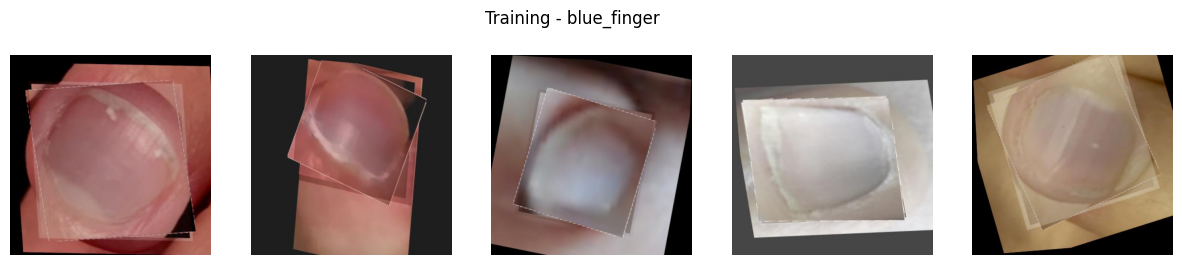

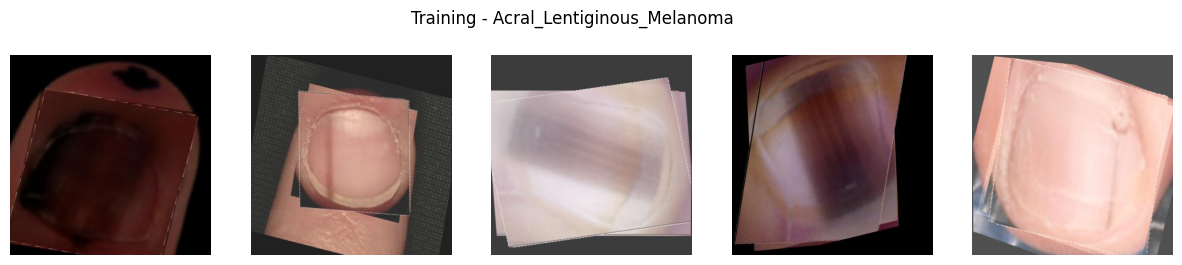

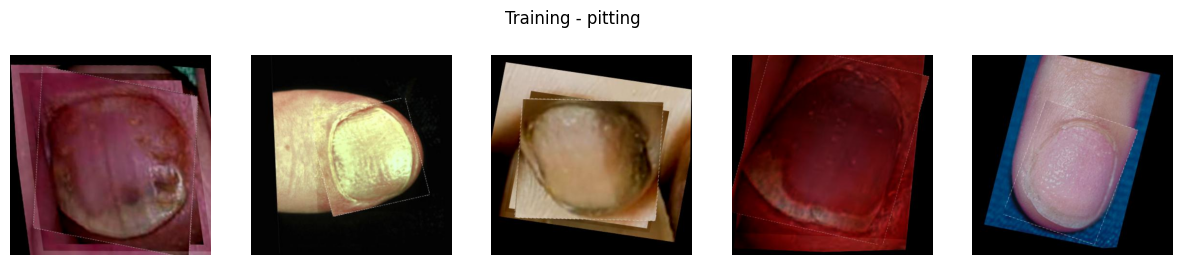

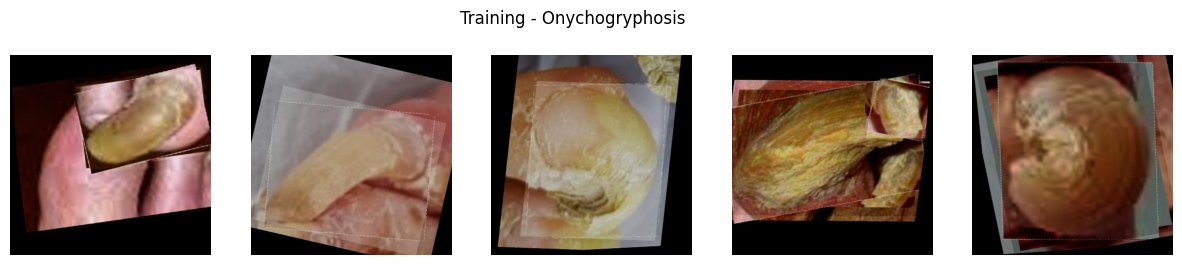

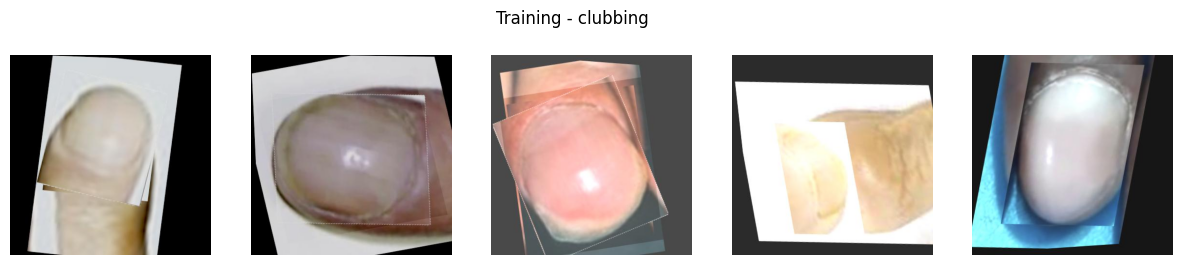

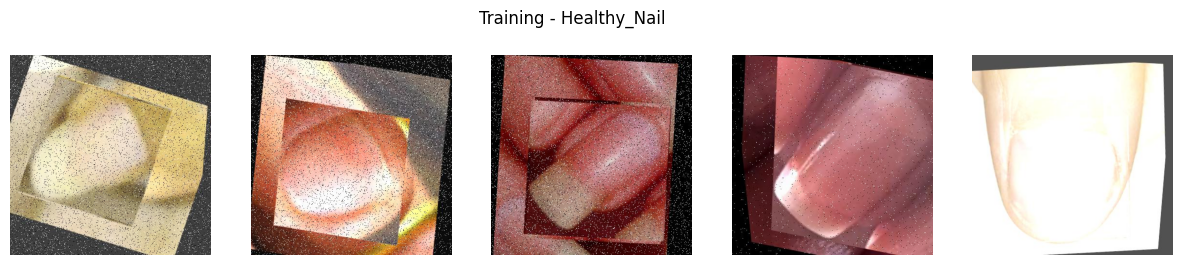

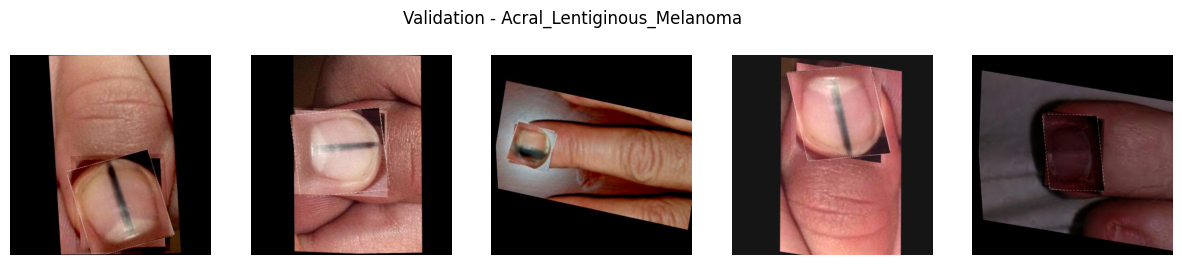

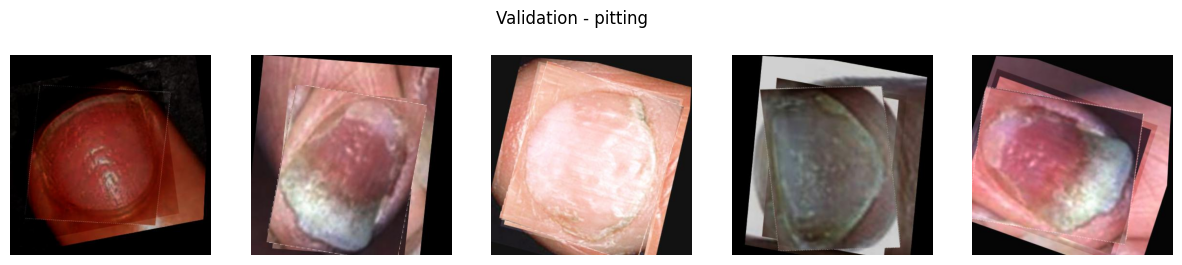

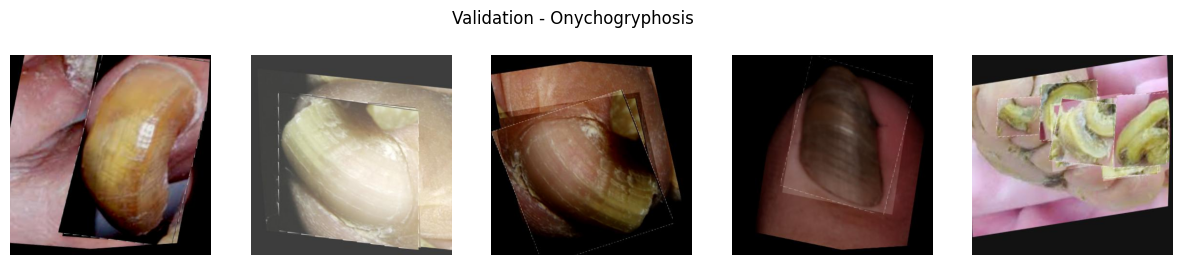

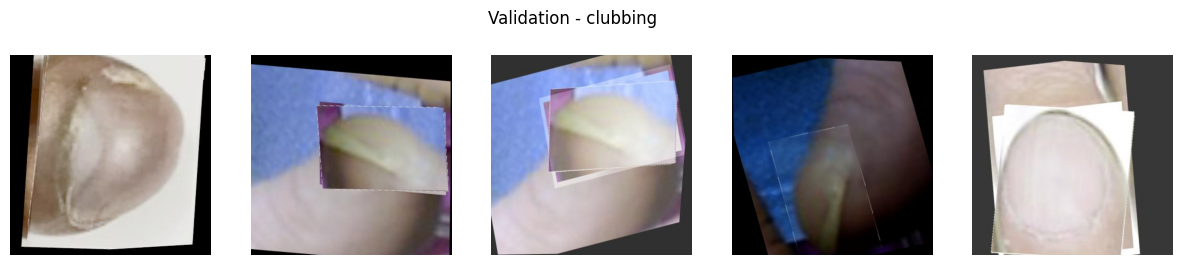

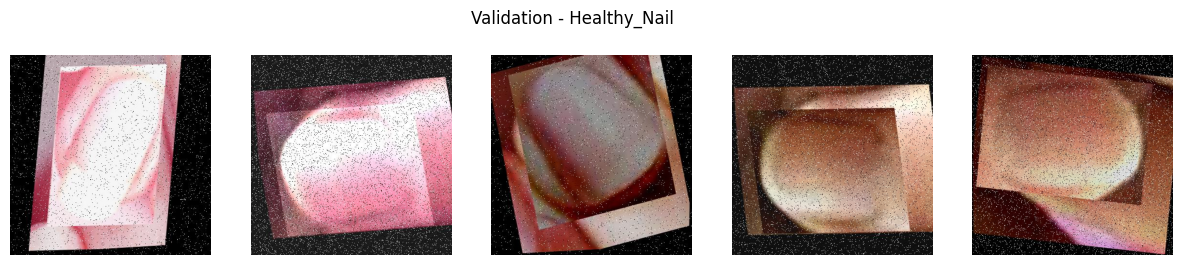

In [8]:
def display_images_from_folder(folder_path, title):
    """Display up to 5 images from a specified folder."""
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    image_files = image_files[:5]  

    plt.figure(figsize=(15, 3)) 
    for i, image_file in enumerate(image_files):
        img_path = os.path.join(folder_path, image_file)
        img = Image.open(img_path)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

for folder in folders:
    folder_path = os.path.join(train_path, folder)
    display_images_from_folder(folder_path, f'Training - {folder}')

for folder in folders:
    folder_path = os.path.join(validation_path, folder)
    display_images_from_folder(folder_path, f'Validation - {folder}')
    
    
#The display_images_from_folder function shows up to 5 images from a specified folder in a row.
#The code then uses this function to display images from both the training and validation folders for each category listed in folders.

In [9]:
#here this function loads an image, resizes it, and normalizes its pixel values.
def preprocess_image(image_path, size=(128, 128)):
    """Load, resize, and normalize an image."""
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, size)
    img = img / 255.0  
    return img
#Saves a preprocessed image to a specified path.
def save_image(image, save_path):
    """Save a preprocessed image."""
    image = (image * 255).astype(np.uint8)  
    img_pil = Image.fromarray(image)
    img_pil.save(save_path)
#takes all images in a folder, processes them, and saves them to another folder.
def preprocess_and_save_images(folder_path, save_dir, size=(128, 128)):
    """Preprocess and save images from a folder."""
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            preprocessed_img = preprocess_image(img_path, size)
            save_path = os.path.join(save_dir, filename)
            save_image(preprocessed_img.numpy(), save_path)

In [11]:
preprocess_and_save_images(train_path, train_path)
preprocess_and_save_images(validation_path, validation_path)

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [13]:
def create_image_dataset(directory, img_size=(128, 128), batch_size=32):
    """Create a TensorFlow dataset from a directory of images."""
    datagen = ImageDataGenerator(rescale=1.0/255) #is used to rescale pixel values to the range [0, 1].
    
    dataset = datagen.flow_from_directory(        #reads images from the specified directory, resizes them,
        directory,                                 # and prepares them in batches.
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',  
        shuffle=True                                #Randomly shuffles the images each epoch.
    )
    
    return dataset

train_dataset = create_image_dataset(train_path)
val_dataset = create_image_dataset(validation_path)

Found 3744 images belonging to 6 classes.
Found 91 images belonging to 6 classes.


The create_image_dataset function prepares images for training by resizing and normalizing them, and then organizes them into batches.It also creates a dataset that TensorFlow can use for training or validation. The train_dataset and val_dataset are prepared using this function for the respective training and validation image directories. This setup is crucial for training machine learning models, as it ensures the images are processed consistently and efficiently in batches.

# Model Building

In [14]:
def create_model(input_shape, num_classes):
    """Create a CNN model for image classification."""
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  
    ])
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

In [15]:
input_shape = (128, 128, 3)  
num_classes = len(train_dataset.class_indices)

In [16]:
model = create_model(input_shape, num_classes)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
if tf.config.list_physical_devices('GPU'):
    print("GPU is available and will be used.")
else:
    print("No GPU found, using CPU.")

GPU is available and will be used.


# Training

In [18]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,  
    verbose=1
)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1725943803.002267      99 service.cc:145] XLA service 0x78c4ac004a00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725943803.002317      99 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1725943803.002322      99 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  1/117 ━━━━━━━━━━━━━━━━━━━━ 19:39 10s/step - accuracy: 0.0938 - loss: 1.8320

I0000 00:00:1725943809.377191      99 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


117/117 ━━━━━━━━━━━━━━━━━━━━ 43s 285ms/step - accuracy: 0.2097 - loss: 1.7776 - val_accuracy: 0.3626 - val_loss: 1.3690
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.3780 - loss: 1.4252 - val_accuracy: 0.5604 - val_loss: 1.1447
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.4453 - loss: 1.3356 - val_accuracy: 0.5934 - val_loss: 1.0713
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.5406 - loss: 1.1549 - val_accuracy: 0.5495 - val_loss: 1.0752
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - accuracy: 0.5501 - loss: 1.0928 - val_accuracy: 0.5824 - val_loss: 1.0355
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.5735 - loss: 1.0493 - val_accuracy: 0.5824 - val_loss: 1.0832
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - accuracy: 0.6117 - loss: 0.9940 - val_accuracy: 0.5824 - val_loss: 1.0772
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.6538 - loss: 0.8776 - val_accura

In [19]:
val_loss, val_accuracy = model.evaluate(val_dataset)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5717 - loss: 1.2813
Validation Loss: 1.170208215713501
Validation Accuracy: 0.6043956279754639


Accuracy: The model correctly identified the class for about 60.44% of the validation images.
Loss: The model's predictions were somewhat off, with a loss of 1.1702. Lower loss values are better.
Overall: The model shows a reasonable performance but there might be room for improvement depending on your specific requirements and the complexity of the dataset.

# Visualization

In [20]:
def plot_history(history):
    """Plot the training history."""
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'])
    plt.grid()

    plt.tight_layout()
    plt.show()

plot_history(history)

#The function plot_history visualizes how the model’s accuracy and loss change over epochs during training.

Accuracy Plot: Shows how the model's accuracy improves (or changes) for both training and validation datasets over time.
Loss Plot: Shows how the model's loss decreases (or changes) for both training and validation datasets over time.